# Starting an IFS simulation from scratch

Let's suppose that you want to model the ideal IFS and don't have any idea (or don't really care) about what the PSFLets look like and where they are located. In that case, you don't need any datafile and can get started ASAP!

Let's load things first.

In [1]:
import numpy as np
import glob
%pylab inline --no-import-all
plt.rc('font', family='serif', serif='Times',size=20)
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=20)
plt.rc('xtick.major', size=10)
plt.rc('ytick.major', size=10)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.rc('figure',titlesize=20)
plt.rc('image',origin='lower',interpolation='nearest')

import sys
import os

Populating the interactive namespace from numpy and matplotlib


### Initializes the logger used throughout the software


In [2]:
from crispy.tools.initLogger import getLogger
log = getLogger('crispy')

### Operate in your working directory (where your parameter file lives)

In [3]:
os.chdir('/Users/mrizzo/IFS/crispy/crispy/WFIRST_SC/')

### Load parameters

In [4]:
from params import Params
par = Params()
par.hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
COMMENT                                                                         
COMMENT ************************************************************            
COMMENT ********************** General parameters ******************            
COMMENT ************************************************************            
COMMENT                                                                         
NLENS   =                  108 / # lenslets across array                        
PITCH   =             0.000174 / Lenslet pitch (meters)                         
INTERLAC=                    3 / Interlacing                                    
PHILENS =    18.434948822922

First off, you are going to trick crispy into building a fake wavelength calibration. This is usually important because in the real world, the wavelength calibration is the step that ensures that you can get good data out of your IFS images. For this exercise, you are going to use an a priori wavelength calibration (it's built into crispy) to generate monochromatic flatfields. From these flatfields, you are going to build up your wavelength calibration - just like in real life!

## Generate monochromatic flats

So, what's our wavelength range? We are going to use the fiducial case of 600nm - 720nm, which is the first band of the WFIRST IFS. We are going to construct a few monochromatic flats across that range. The function we need is in the IFS module (that one has a lot of important functions).

In [5]:
from crispy.IFS import createWavecalFiles
help(createWavecalFiles)

Help on function createWavecalFiles in module crispy.IFS:

createWavecalFiles(par, lamlist, dlam=1.0)
    Creates a set of monochromatic IFS images to be used in wavelength calibration step
    
    Parameters
    ----------
    par:   Parameter instance
            Contains all IFS parameters
    lamlist: list or array of floats
            List of discrete wavelengths at which to create a monochromatic flat
    dlam:  float
            Width in nm of the small band for each of the monochromatic wavelengths.
            Default is 1 nm. This has no effect unless we are trying to add any noise.



So here we go:

In [6]:
lamc=720.
lamlist = np.arange(lamc*(1.-par.BW/2.),lamc*(1.+par.BW/2.),5.)

# let's create our new wavelength calibration directory to not mess up anything
# comment this out if this was already done and you are fine overriding the files in your folder
# try:
#     os.makedirs(par.prefix+'/testWavecal660')
# except OSError:
#     log.error('Wavecal folder already exists!')
#     raise

log.info('Wavecal folder is: %s' % par.wavecalDir)

crispy - INFO - Wavecal folder is: ..//ReferenceFiles/wavecalR50_SC/


In [7]:
createWavecalFiles(par,lamlist)

crispy - INFO - The number of input pixels per lenslet is 4.598662
crispy - INFO - Using PSFlet gaussian approximation
crispy - WARNING - Assuming slices are evenly spread in wavelengths
crispy - INFO - Done.
crispy - INFO - Performance: 4 seconds total
crispy - INFO - Writing data to ..//ReferenceFiles/wavecalR50_SC/det_597.fits
crispy - INFO - The number of input pixels per lenslet is 4.598662
crispy - INFO - Using PSFlet gaussian approximation
crispy - WARNING - Assuming slices are evenly spread in wavelengths
crispy - INFO - Done.
crispy - INFO - Performance: 4 seconds total
crispy - INFO - Writing data to ..//ReferenceFiles/wavecalR50_SC/det_602.fits
crispy - INFO - The number of input pixels per lenslet is 4.598662
crispy - INFO - Using PSFlet gaussian approximation
crispy - WARNING - Assuming slices are evenly spread in wavelengths
crispy - INFO - Done.
crispy - INFO - Performance: 4 seconds total
crispy - INFO - Writing data to ..//ReferenceFiles/wavecalR50_SC/det_607.fits
cris

Let's take a look at what we did.

In [8]:
listfiles = glob.glob(par.wavecalDir+'*.fits')
print listfiles

['..//ReferenceFiles/wavecalR50_SC/det_597.fits', '..//ReferenceFiles/wavecalR50_SC/det_602.fits', '..//ReferenceFiles/wavecalR50_SC/det_607.fits', '..//ReferenceFiles/wavecalR50_SC/det_612.fits', '..//ReferenceFiles/wavecalR50_SC/det_617.fits', '..//ReferenceFiles/wavecalR50_SC/det_622.fits', '..//ReferenceFiles/wavecalR50_SC/det_627.fits', '..//ReferenceFiles/wavecalR50_SC/det_632.fits', '..//ReferenceFiles/wavecalR50_SC/det_637.fits', '..//ReferenceFiles/wavecalR50_SC/det_642.fits', '..//ReferenceFiles/wavecalR50_SC/det_647.fits', '..//ReferenceFiles/wavecalR50_SC/det_652.fits', '..//ReferenceFiles/wavecalR50_SC/det_657.fits', '..//ReferenceFiles/wavecalR50_SC/det_662.fits', '..//ReferenceFiles/wavecalR50_SC/det_667.fits', '..//ReferenceFiles/wavecalR50_SC/det_672.fits', '..//ReferenceFiles/wavecalR50_SC/det_677.fits', '..//ReferenceFiles/wavecalR50_SC/det_682.fits', '..//ReferenceFiles/wavecalR50_SC/det_687.fits', '..//ReferenceFiles/wavecalR50_SC/det_692.fits', '..//ReferenceFiles

Now let's show some images. We use the Image module of crispy for convenience.

crispy - INFO - Read data from HDU 1 of ..//ReferenceFiles/wavecalR50_SC/det_597.fits


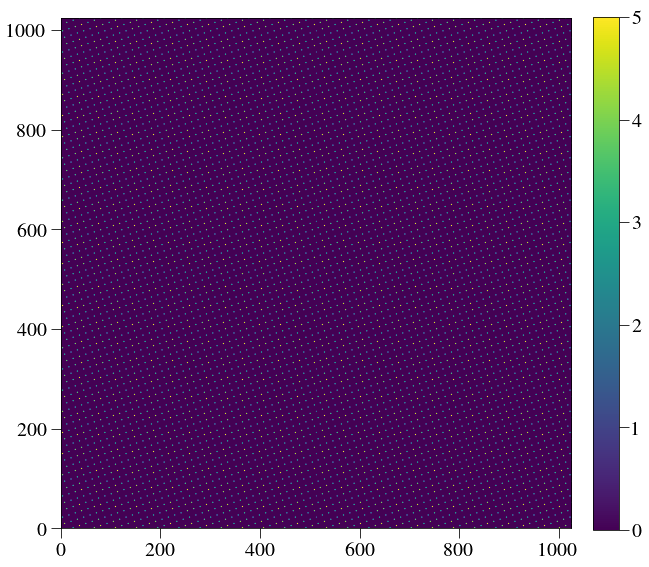

In [9]:
from crispy.tools.image import Image
plt.figure(figsize=(10,10))
plt.imshow(Image(listfiles[0]).data)
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

And a little zoom in:

crispy - INFO - Read data from HDU 1 of ..//ReferenceFiles/wavecalR50_SC/det_597.fits


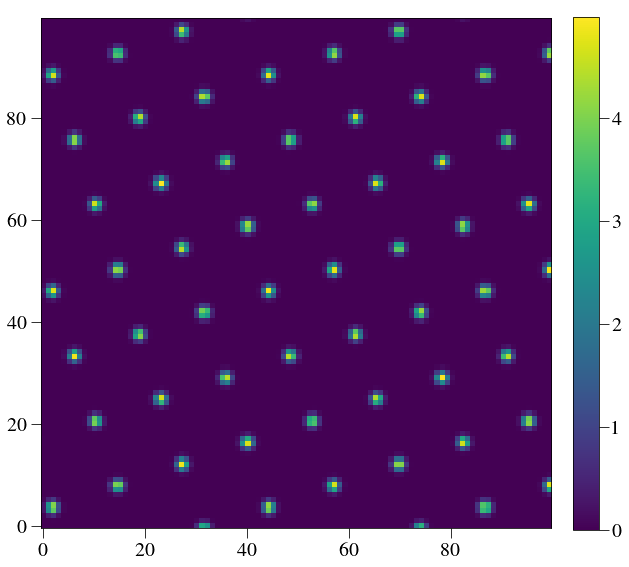

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(Image(listfiles[0]).data[450:550,450:550])
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

The PSFLets are slowly changing because the geometry that we chose results in almost integer spacing in both X and Y between neighboring lenslets. If you want more diversity (usually it is preferable to have diversity), then change the lenslet size of detector pitch by a little bit.

## Run a complete wavelength calibration

Now that we have monochromatic flats, it is time to run a wavelength calibration, just like one would do in any IFS. The function we need is in crispy.tools.wavecal. This is a much more complicated function.

In [11]:
from crispy.tools.wavecal import buildcalibrations


help(buildcalibrations)

Help on function buildcalibrations in module crispy.tools.wavecal:

buildcalibrations(par, filelist=None, lamlist=None, order=3, inspect=False, genwavelengthsol=False, makehiresPSFlets=False, makePolychrome=False, makehiresPolychrome=False, makePSFWidths=False, savehiresimages=True, borderpix=4, upsample=5, nsubarr=3, parallel=True, inspect_first=True, apodize=False, lamsol=None)
    Master wavelength calibration function
    
    Parameters
    ----------
    par :   Parameter instance
            Contains all IFS parameters
    filelist: list of strings (optional)
            List of the fits files that contain the monochromatic calibration files. If None (default),
            use the files in par.filelist
    lamlist: list of floats (optional)
            Wavelengths in nm at which the files are taken. If None (default),
            use the files in par.lamlist
    order: int
            Order of the polynomial used to fit the PSFLet positions across the detector
    genwavelengths

In [12]:
# we can check that the file list has been loaded:
log.info('Wavecal files: %s' % par.filelist)

crispy - INFO - Wavecal files: ['..//ReferenceFiles/wavecalR50_SC/det_597.fits', '..//ReferenceFiles/wavecalR50_SC/det_602.fits', '..//ReferenceFiles/wavecalR50_SC/det_607.fits', '..//ReferenceFiles/wavecalR50_SC/det_612.fits', '..//ReferenceFiles/wavecalR50_SC/det_617.fits', '..//ReferenceFiles/wavecalR50_SC/det_622.fits', '..//ReferenceFiles/wavecalR50_SC/det_627.fits', '..//ReferenceFiles/wavecalR50_SC/det_632.fits', '..//ReferenceFiles/wavecalR50_SC/det_637.fits', '..//ReferenceFiles/wavecalR50_SC/det_642.fits', '..//ReferenceFiles/wavecalR50_SC/det_647.fits', '..//ReferenceFiles/wavecalR50_SC/det_652.fits', '..//ReferenceFiles/wavecalR50_SC/det_657.fits', '..//ReferenceFiles/wavecalR50_SC/det_662.fits', '..//ReferenceFiles/wavecalR50_SC/det_667.fits', '..//ReferenceFiles/wavecalR50_SC/det_672.fits', '..//ReferenceFiles/wavecalR50_SC/det_677.fits', '..//ReferenceFiles/wavecalR50_SC/det_682.fits', '..//ReferenceFiles/wavecalR50_SC/det_687.fits', '..//ReferenceFiles/wavecalR50_SC/det

One important aspect is that we can choose to use the same models for PSFLets as the one that was used to construct the monochromatic flatfields. This basically assumes that we have 100% knowledge of all the PSFLets, and can be set if par.gaussian_hires=True. Otherwise, we can actually use the deconvolution functions within crispy to approximate the lenslet PSFLets, by dividing up the detector into nsubarr^2 regions and averaging the PSFLets over these regions. Let's assume for now that we have excellent models of our PSFLets.

In [13]:
par.gaussian_hires=True # assuming we know the PSFLets perfectly a priori

If you choose to change that to False, you should also change the following nsubarr parameter to >4 since there is likely variation of the PSFLet across the field of view. Let's go! This takes a few minutes. It will finish by a parallel process so don't worry if your computer heats up a bit.

In [15]:
par.nchanperspec_lstsq=1.2
buildcalibrations(par,
                    inspect=False,         # if True, constructs a bunch of images to verify a good calibration
                    genwavelengthsol=True, # Compute wavelength at the center of all pixels
                    makehiresPSFlets=True, # this requires very high SNR on the monochromatic frames
                    makePSFWidths=True,
                    makePolychrome=True,   # This is needed to use least squares extraction
                    upsample=3,            # upsampling factor of the high-resolution PSFLets
                    nsubarr=1,             # the detector is divided into nsubarr^2 regions for PSFLet averaging
                    apodize=False,          # to match PSFlet spot locations, only use the inner circular part of the 
                                           #detector, hence discarding the corners of the detector where lenslets are 
                                           #distorted
                  ) 

crispy - INFO - Building calibration files, placing results in ..//ReferenceFiles/wavecalR50_SC/
crispy - INFO - Read data from HDU 1 of ..//ReferenceFiles/wavecalR50_SC/det_597.fits
crispy - INFO - Read data from HDU 1 of ..//ReferenceFiles/wavecalR50_SC/det_597.fits
crispy - INFO - Initializing PSFlet location transformation coefficients
crispy - INFO - Performing initial optimization of PSFlet location transformation coefficients for frame ..//ReferenceFiles/wavecalR50_SC/det_597.fits
crispy - INFO - Performing final optimization of PSFlet location transformation coefficients for frame ..//ReferenceFiles/wavecalR50_SC/det_597.fits
crispy - INFO - Read data from HDU 1 of ..//ReferenceFiles/wavecalR50_SC/det_602.fits
crispy - INFO - Initializing transformation coefficients with previous values
crispy - INFO - Performing final optimization of PSFlet location transformation coefficients for frame ..//ReferenceFiles/wavecalR50_SC/det_602.fits
crispy - INFO - Read data from HDU 1 of ..//R

Let's take a look at the files we constructed:

In [ ]:
os.listdir(par.wavecalDir)

Some of these files are described and explained in the papers associated with this work. 

## Construct fields to extract

Now, let's construct a field that we will want to extract. For example, we will use a flatfield.

In [ ]:
from crispy.unitTests import testCreateFlatfield
help(testCreateFlatfield)

In [ ]:
par.savePoly=True
par.saveRotatedInput = True
testCreateFlatfield(par,useQE=False)

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(Image(par.unitTestsOutputs+'/flatfield.fits').data)
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(Image(par.unitTestsOutputs+'/flatfield.fits').data[500:550,500:550])
plt.axis('off')
plt.show()

## Reduce the flatfield!

In [ ]:
from crispy.IFS import reduceIFSMap
help(reduceIFSMap)
detector = reduceIFSMap(par,par.unitTestsOutputs+'/flatfield.fits',method='lstsq',smoothbad=False)

Let's plot what we have got

In [ ]:
ftsize = 15
cmap='viridis'
plt.figure(figsize=(10,10))
plt.imshow(Image(par.exportDir+'/flatfield_red_lstsq.fits').data[5],cmap=cmap)
plt.axis('off')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('Data',fontsize=ftsize)
plt.show()


In [ ]:
from astropy.io import fits
BB = fits.getdata(par.unitTestsOutputs+"/flatfield.fits")
BBres = fits.getdata(par.exportDir+'/flatfield_red_lstsq_resid.fits')
BBmod = fits.getdata(par.exportDir+'/flatfield_red_lstsq_model.fits')
plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(BB[850:-100,150:300].T,vmin=0,vmax=np.amax(BB[850:-100,150:300]),cmap=cmap)
plt.axis('off')
plt.colorbar(fraction=0.046, pad=0.04,orientation='horizontal')
plt.title('Data',fontsize=ftsize)
plt.subplot(132)
plt.imshow(BBmod[850:-100,150:300].T,vmin=0,vmax=np.amax(BB[850:-100,150:300]),cmap=cmap)
plt.axis('off')
plt.colorbar(fraction=0.046, pad=0.04,orientation='horizontal')
plt.title('Model',fontsize=ftsize)
plt.subplot(133)
plt.imshow(100*BBres[850:-100,150:300].T/np.amax(BB[850:-120,150:300].T),vmin=-2,vmax=2,cmap=cmap)
plt.axis('off')
plt.colorbar(fraction=0.046, pad=0.04,orientation='horizontal')
plt.title('Residuals (\% of data max)',fontsize=ftsize)
plt.tight_layout()
plt.show()

The residuals are caused by an imperfect wavelength calibration (small errors in centroids). In this region it is less than +/-2% of the peak data value, and the induced errors in recovered flux are +/-1% in slice number 5 (see above). These are systematic errors that we can calibrate by using an IFS flat field.

If we want to know the correspondence between slice and wavelength, we can do the following

In [ ]:
from crispy.tools.reduction import calculateWaveList
lam_midpts,lam_endpts = calculateWaveList(par,method='lstsq')
print('Wavelengths at midpoints for lstsq (nm): ',lam_midpts)
print('Wavelengths at endpoints for lstsq (nm): ',lam_endpts)
lam_midpts,lam_endpts = calculateWaveList(par,method='optext')
print('Wavelengths at midpoints for optext (nm): ',lam_midpts)
print('Wavelengths at endpoints for optext (nm): ',lam_endpts)

## Start from known wavecal

In the case where we want to use another wavecal (e.g. obtained from lab measurements), we can set this up with par.PSFLetPositions = True

In [ ]:
par.PSFLetPositions = True
par.wavecalDir = par.prefix+'/Calibra_170425/'

# watch out to be sure you have the correct R that matches the wavecal! In this case, it is R=70
par.R = 70

Repeat the flatfield exercise

In [ ]:
from crispy.unitTests import testCreateFlatfield
testCreateFlatfield(par,useQE=False)

We can also use the PSFLet models that were determined experimentally, or externally-generated, as long as they are in the same format as the one that crispy's calibration routine uses.